In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('combine_data_since_2000_PROCESSED_2018-04-26.csv')

In [ ]:
#df  # display data

In [ ]:
df = df.dropna()  # drop rows with null entries

In [ ]:
#df = df.reset_index()
#df.drop(['index'], axis=1,inplace=True)
df

,Player,Pos,Ht,Wt,Forty,Vertical,BenchReps,BroadJump,Cone,Shuttle,Year,Pfr_ID,AV,Team,Round,Pick
0,Darnell Alford,OT,76,334,5.56,25.0,23.0,94.0,8.48,4.98,2000,AlfoDa20,0.0,Kansas City Chiefs,6.0,188.0
1,Reggie Austin,CB,69,175,4.44,35.0,17.0,119.0,7.03,4.14,2000,AustRe20,3.0,Chicago Bears,4.0,125.0
2,Rashidi Barnes,FS,72,208,4.62,35.0,10.0,114.0,6.92,4.32,2000,BarnRa20,1.0,Cleveland Browns,7.0,225.0
3,David Barrett,CB,70,199,4.44,37.5,16.0,116.0,6.81,4.04,2000,BarrDa22,10.0,Arizona Cardinals,4.0,102.0
4,Rogers Beckett,FS,73,207,4.62,39.5,15.0,119.0,6.48,4.29,2000,BeckRo20,12.0,San Diego Chargers,2.0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1782,TreDavious White,CB,71,192,4.47,32.0,16.0,119.0,6.90,4.32,2017,WhitTr01,5.0,Buffalo Bills,1.0,27.0
1783,Joe Williams,RB,71,210,4.41,35.0,14.0,125.0,7.19,4.19,2017,WillJo12,0.0,San Francisco 49ers,4.0,121.0
1784,Jordan Willis,DE,76,255,4.53,39.0,24.0,125.0,6.85,4.28,2017,WillJo09,2.0,Cincinnati Bengals,3.0,73.0
1785,Quincy Wilson-02,CB,73,211,4.54,32.0,14.0,118.0,6.86,4.02,2017,WilsQu01,2.0,Indianapolis Colts,2.0,46.0


initialize all data frames and targets




In [ ]:
all_target = df['Pick']
df_all = df.drop(['Player', 'Pos', 'Pfr_ID', 'Team', 'Pick', 'Year' ,'AV', 'Round'], axis=1)

# wr
df_wr = df[df['Pos'] == 'WR']
wr_target = df_wr[['Pick']]
df_wr = df_wr.drop(['Player', 'Pos', 'Pfr_ID', 'Team', 'Pick', 'Year' ,'AV', 'Round'], axis=1)

# cb
df_cb = df[df['Pos'] == 'CB']
cb_target = df_cb[['Pick']]
df_cb = df_cb.drop(['Player', 'Pos', 'Pfr_ID', 'Team', 'Pick', 'Year' ,'AV', 'Round'], axis=1)

# og
df_og = df[df['Pos'] == 'OG']
og_target = df_og[['Pick']]
df_og = df_og.drop(['Player', 'Pos', 'Pfr_ID', 'Team', 'Pick', 'Year' ,'AV', 'Round'], axis=1)

# dt
df_dt = df[df['Pos'] == 'DT']
dt_target = df_dt[['Pick']]
df_dt = df_dt.drop(['Player', 'Pos', 'Pfr_ID', 'Team', 'Pick', 'Year' ,'AV', 'Round'], axis=1)

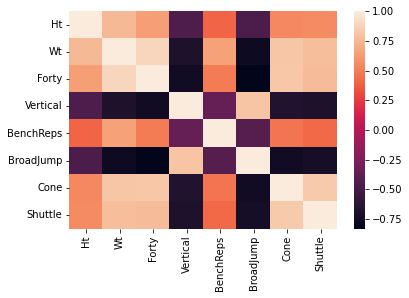

In [ ]:
import seaborn as sns
sns.heatmap(df_all.corr())

In [ ]:
df_all.corr()

,Ht,Wt,Forty,Vertical,BenchReps,BroadJump,Cone,Shuttle
Ht,1.000000,0.760141,0.638481,-0.457322,0.402897,-0.460546,0.542703,0.562288
Wt,0.760141,1.000000,0.897970,-0.689945,0.653970,-0.766660,0.817496,0.781780
Forty,0.638481,0.897970,1.000000,-0.750163,0.494215,-0.829440,0.825045,0.776900
Vertical,-0.457322,-0.689945,-0.750163,1.000000,-0.349829,0.812754,-0.671589,-0.689056
BenchReps,0.402897,0.653970,0.494215,-0.349829,1.000000,-0.421608,0.468888,0.424903
BroadJump,-0.460546,-0.766660,-0.829440,0.812754,-0.421608,1.000000,-0.746051,-0.722947
Cone,0.542703,0.817496,0.825045,-0.671589,0.468888,-0.746051,1.000000,0.839235
Shuttle,0.562288,0.781780,0.776900,-0.689056,0.424903,-0.722947,0.839235,1.000000


In [ ]:
print('wr summary stats ', df_wr.describe())
print('dt summary stats ',df_cb.describe())


wr summary stats                 Ht          Wt       Forty    Vertical   BenchReps   BroadJump  \
count  145.000000  145.000000  145.000000  145.000000  145.000000  145.000000   
mean    72.510345  202.593103    4.467310   35.724138   14.675862  121.537931   
std      2.351469   14.756588    0.086556    3.108529    4.385713    5.722787   
min     65.000000  166.000000    4.260000   26.000000    4.000000  105.000000   
25%     71.000000  192.000000    4.410000   33.500000   11.000000  118.000000   
50%     73.000000  202.000000    4.460000   35.500000   15.000000  121.000000   
75%     74.000000  211.000000    4.530000   37.500000   18.000000  125.000000   
max     78.000000  244.000000    4.680000   45.000000   27.000000  139.000000   

             Cone     Shuttle  
count  145.000000  145.000000  
mean     6.888828    4.224621  
std      0.173740    0.143130  
min      6.500000    3.810000  
25%      6.770000    4.130000  
50%      6.900000    4.210000  
75%      7.020000    4.33000

#Conducting PCA to limit the multi-collinearity of the Data

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
#Saving a copy of the original dataframe


scaler = StandardScaler()
scaler.fit(df_all)
x_scaled = scaler.transform(df_all)
x_normal = pd.DataFrame(x_scaled, columns=df_all.columns)

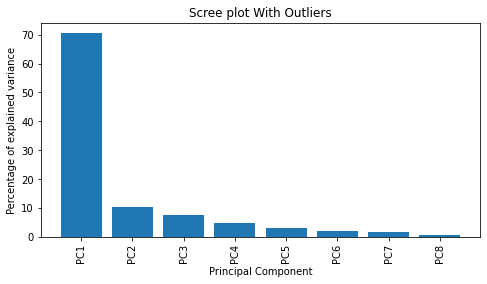

In [ ]:
from sklearn.decomposition import PCA
from sklearn import preprocessing 
import matplotlib.pyplot as plt
import numpy as np

def cm_to_inch(value):
    return value/2.54


plt.figure(figsize=(cm_to_inch(20), cm_to_inch(10)))
pca = PCA()
pca.fit(x_normal)
pca_data = pca.transform(x_normal)


per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
label = ['PC' + str(x) for x in range(1, len(per_var)+1)]
pca_df = pd.DataFrame(pca_data,  columns=label)
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label = label)
plt.ylabel('Percentage of explained variance')
plt.xlabel('Principal Component')
plt.title('Scree plot With Outliers')
plt.xticks(rotation='vertical')
plt.show()





95.8
8


Text(0.5, 1.0, 'Eigenvalue plot with Outliers')

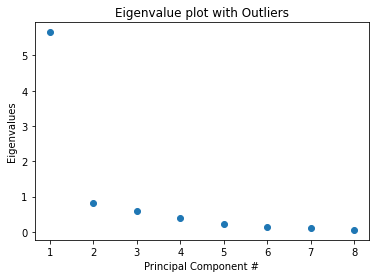

In [ ]:
print(per_var[0]+per_var[1]+per_var[2]+per_var[3]+per_var[4])
eigenvalues = pca.explained_variance_
print(len(eigenvalues))
nums = np.arange(1, 9)

plt.scatter(nums, eigenvalues)
plt.xlabel('Principal Component #')
plt.ylabel('Eigenvalues')
plt.title("Eigenvalue plot with Outliers")

In [ ]:
pca_data = pd.DataFrame(pca_data)[[0,1,2,3]]
pca_data

,0,1,2,3
0,5.366425,-1.510697,0.048855,0.868148
1,-2.763557,-0.941549,1.025820,0.194112
2,-1.836212,-1.425543,-0.466593,0.012914
3,-2.911117,-0.545897,0.598198,-0.184767
4,-2.547412,-0.004586,-0.601742,-0.075676
...,...,...,...,...
1782,-2.010494,-1.052328,0.392502,-0.169146
1783,-2.409907,-0.689123,-0.014151,0.513793
1784,-1.426011,1.717073,-0.804768,0.113485
1785,-2.029926,-0.764471,-0.310439,-1.060873


In [ ]:
pca_wr = pca_data[df['Pos'] == 'WR']
pca_cb = pca_data[df['Pos'] == 'CB']
pca_og = pca_data[df['Pos'] == 'OG']
pca_dt = pca_data[df['Pos'] == 'DT']



#Splitting up the PCA Data into train/test

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
scaler2=MinMaxScaler(feature_range=(0,1))

pca_wr_train, pca_wr_test, pca_wr_target_train, pca_wr_target_test = train_test_split(pca_wr, wr_target, test_size=0.20, random_state=42)
pca_dt_train, pca_dt_test, pca_dt_target_train, pca_dt_target_test = train_test_split(pca_dt, dt_target, test_size=0.20, random_state=42)
pca_og_train, pca_og_test, pca_og_target_train, pca_og_target_test = train_test_split(pca_og, og_target, test_size=0.20, random_state=42)
pca_cb_train, pca_cb_test, pca_cb_target_train, pca_cb_target_test = train_test_split(pca_cb, cb_target, test_size=0.20, random_state=42)

pca_wr_target_train = scaler2.fit_transform(np.array(pca_wr_target_train[['Pick']]))
pca_dt_target_train = scaler2.fit_transform(np.array(pca_dt_target_train[['Pick']]))
pca_og_target_train = scaler2.fit_transform(np.array(pca_og_target_train[['Pick']]))
pca_cb_target_train = scaler2.fit_transform(np.array(pca_cb_target_train[['Pick']]))

pca_wr_target_test = scaler2.transform(np.array(pca_wr_target_test[['Pick']]))
pca_dt_target_test= scaler2.transform(np.array(pca_dt_target_test[['Pick']]))
pca_og_target_test = scaler2.transform(np.array(pca_og_target_test[['Pick']]))
pca_cb_target_test = scaler2.transform(np.array(pca_cb_target_test[['Pick']]))

#Fitting Linear regression on the PCA data

In [ ]:
from sklearn.linear_model import LinearRegression

# wr
pca_lin_wr = LinearRegression().fit(pca_wr_train, pca_wr_target_train)
predict_lin_wr = pca_lin_wr.predict(pca_wr_test)

# cb
pca_lin_cb = LinearRegression().fit(pca_cb_train, pca_cb_target_train)
predict_lin_cb = pca_lin_cb.predict(pca_cb_test)

# og
pca_lin_og = LinearRegression().fit(pca_og_train, pca_og_target_train)
predict_lin_og = pca_lin_og.predict(pca_og_test)

# dt
pca_lin_dt = LinearRegression().fit(pca_dt_train, pca_dt_target_train)
predict_lin_dt = pca_lin_dt.predict(pca_dt_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
#Using all predictors
print(f"(wr) MSE: {mean_squared_error(pca_wr_target_test, predict_lin_wr)},\tR2: {r2_score(pca_wr_target_test, predict_lin_wr)}")
print(f"(cb) MSE: {mean_squared_error(pca_cb_target_test, predict_lin_cb)},\tR2: {r2_score(pca_cb_target_test, predict_lin_cb)}")
print(f"(og) MSE: {mean_squared_error(pca_og_target_test, predict_lin_og)},\tR2: {r2_score(pca_og_target_test, predict_lin_og)}")
print(f"(dt) MSE: {mean_squared_error(pca_dt_target_test, predict_lin_dt)},\tR2: {r2_score(pca_dt_target_test, predict_lin_dt)}")

(wr) MSE: 0.07247903143374185,	R2: -0.13274027519010412
(cb) MSE: 0.055768448009623335,	R2: 0.08496407084537128
(og) MSE: 0.060823606434196105,	R2: 0.08137558405537915
(dt) MSE: 0.07520561049534533,	R2: 7.272663922341938e-05


In [ ]:
mse_scores = {'WR':0.07247903143374185, 'CB': 0.055768448009623335, 'OG':0.060823606434196105, 'DT':0.07520561049534533}
data_items = mse_scores.items()
data_list = list(data_items)
mse_df = pd.DataFrame(data_list)
print(f"mse table for significant\npredictors (PCA linear regression)")
mse_df

mse table for significant
predictors (PCA linear regression)


,0,1
0,WR,0.072479
1,CB,0.055768
2,OG,0.060824
3,DT,0.075206


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

parameters = {'n_neighbors': list(range(1, 11))}

knn1 = KNeighborsRegressor()
clf = GridSearchCV(knn1, parameters)
clf_pca_wr = clf.fit(pca_wr_train, pca_wr_target_train)
clf_pca_cb = clf.fit(pca_cb_train, pca_cb_target_train)
clf_pca_og = clf.fit(pca_og_train, pca_og_target_train)
clf_pca_dt = clf.fit(pca_dt_train, pca_dt_target_train)

Text(0.5, 1.0, 'PCA KNN WR')

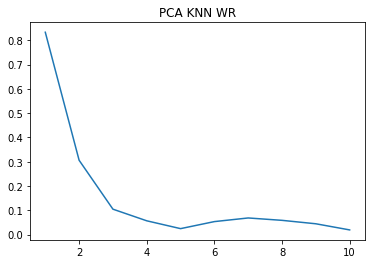

In [ ]:
import matplotlib.pyplot as plt
pca_wr_knn = pd.DataFrame(clf_pca_wr.cv_results_)
plt.plot(pca_wr_knn['param_n_neighbors'], abs(pca_wr_knn['mean_test_score']))
plt.title('PCA KNN WR')

Text(0.5, 1.0, 'PCA KNN CB')

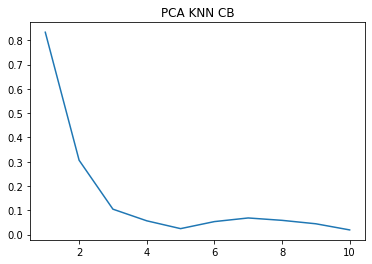

In [ ]:
import matplotlib.pyplot as plt
pca_cb_knn = pd.DataFrame(clf_pca_cb.cv_results_)
plt.plot(pca_cb_knn['param_n_neighbors'], abs(pca_cb_knn['mean_test_score']))
plt.title('PCA KNN CB')

In [ ]:
knn_wr_pca = KNeighborsRegressor(n_neighbors=10).fit(pca_wr_train, pca_wr_target_train)
knn_cb_pca = KNeighborsRegressor(n_neighbors=10).fit(pca_cb_train, pca_cb_target_train)
knn_og_pca = KNeighborsRegressor(n_neighbors=10).fit(pca_og_train, pca_og_target_train)
knn_dt_pca = KNeighborsRegressor(n_neighbors=10).fit(pca_dt_train, pca_dt_target_train)

In [ ]:
knn_pred_wr = knn_wr_pca.predict(pca_wr_test)
knn_pred_cb = knn_cb_pca.predict(pca_cb_test)
knn_pred_og = knn_og_pca.predict(pca_og_test)
knn_pred_dt = knn_dt_pca.predict(pca_dt_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
#Using all predictors
print(f"(wr) MSE: {mean_squared_error(pca_wr_target_test, knn_pred_wr)}")
print(f"(cb) MSE: {mean_squared_error(pca_cb_target_test, knn_pred_cb)}")
print(f"(og) MSE: {mean_squared_error(pca_og_target_test, knn_pred_og)}")
print(f"(dt) MSE: {mean_squared_error(pca_dt_target_test, knn_pred_dt)}")

(wr) MSE: 0.06774129920847179
(cb) MSE: 0.06447587837263952
(og) MSE: 0.05856302881904613
(dt) MSE: 0.07002307002050201


In [ ]:
mse_scores = {'WR': 0.06774129920847179, 'CB':0.06447587837263952, 'OG':0.05856302881904613, 'DT':0.07002307002050201}
data_items = mse_scores.items()
data_list = list(data_items)
mse_df = pd.DataFrame(data_list)
print(f"mse table for significant\npredictors (PCA KNN regression)")
mse_df

mse table for significant
predictors (PCA KNN regression)


,0,1
0,WR,0.067741
1,CB,0.064476
2,OG,0.058563
3,DT,0.070023


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestRegressor(random_state = 42)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 30, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
pca_rf_wr = rf_random.fit(pca_wr_train, pca_wr_target_train)
pca_rf_cb = rf_random.fit(pca_cb_train, pca_cb_target_train)
pca_rf_og = rf_random.fit(pca_og_train, pca_og_target_train)
pca_rf_dt = rf_random.fit(pca_dt_train, pca_dt_target_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Fitting 3 folds for each of 30 candidates, totalling 90 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Fitting 3 folds for each of 30 candidates, totalling 90 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Fitting 3 folds for each of 30 candidates, totalling 90 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [ ]:
rf_pca_wr = pd.DataFrame(pca_rf_wr.cv_results_)
rf_pca_cb = pd.DataFrame(pca_rf_cb.cv_results_)
rf_pca_og = pd.DataFrame(pca_rf_og.cv_results_)
rf_pca_dt = pd.DataFrame(pca_rf_dt.cv_results_)

In [ ]:
print('WR best Params', pca_rf_wr.best_params_)
print('CB best Params', pca_rf_cb.best_params_)
print('OG best Params', pca_rf_og.best_params_)
print('DT best Params', pca_rf_dt.best_params_)

WR best Params {'n_estimators': 1400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 110, 'bootstrap': True}
CB best Params {'n_estimators': 1400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 110, 'bootstrap': True}
OG best Params {'n_estimators': 1400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 110, 'bootstrap': True}
DT best Params {'n_estimators': 1400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 110, 'bootstrap': True}


In [ ]:
rf_pred_wr = pca_rf_wr.predict(pca_wr_test)
rf_pred_cb = pca_rf_cb.predict(pca_cb_test)
rf_pred_dt = pca_rf_dt.predict(pca_dt_test)
rf_pred_og = pca_rf_og.predict(pca_og_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
#Using all predictors
print(f"(wr) MSE: {mean_squared_error(pca_wr_target_test, rf_pred_wr)}")
print(f"(cb) MSE: {mean_squared_error(pca_cb_target_test, rf_pred_cb)}")
print(f"(og) MSE: {mean_squared_error(pca_dt_target_test, rf_pred_dt)}")
print(f"(dt) MSE: {mean_squared_error(pca_og_target_test, rf_pred_og)}")

(wr) MSE: 0.08817638539390805
(cb) MSE: 0.09379021700686213
(og) MSE: 0.08669140038928459
(dt) MSE: 0.0676143528706247


In [ ]:
mse_scores = {'WR': 0.08817638539390805, 'CB':0.09379021700686213, 'OG':0.08669140038928459, 'DT':0.0676143528706247}
data_items = mse_scores.items()
data_list = list(data_items)
mse_df = pd.DataFrame(data_list)
print(f"mse table for significant\npredictors (PCA RF regression)")
mse_df

mse table for significant
predictors (PCA RF regression)


,0,1
0,WR,0.088176
1,CB,0.093790
2,OG,0.086691
3,DT,0.067614


split up into train/test data (80/20)


In [ ]:
from sklearn.model_selection import train_test_split

wr_train, wr_test, wr_target_train, wr_target_test = train_test_split(df_wr, wr_target, test_size=0.20, random_state=42)
dt_train, dt_test, dt_target_train, dt_target_test = train_test_split(df_dt, dt_target, test_size=0.20, random_state=42)
og_train, og_test, og_target_train, og_target_test = train_test_split(df_og, og_target, test_size=0.20, random_state=42)
cb_train, cb_test, cb_target_train, cb_target_test = train_test_split(df_cb, cb_target, test_size=0.20, random_state=42)

normalize our data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
scaler1=MinMaxScaler(feature_range=(0,1))
# df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
wr_scaled_train = scaler.fit_transform(wr_train)
dt_scaled_train = scaler.fit_transform(dt_train)
og_scaled_train= scaler.fit_transform(og_train)
cb_scaled_train = scaler.fit_transform(cb_train)

In [ ]:
import numpy as np
wr_target_train = scaler1.fit_transform(np.array(wr_target_train[['Pick']]))
dt_target_train = scaler1.fit_transform(np.array(dt_target_train[['Pick']]))
og_target_train = scaler1.fit_transform(np.array(og_target_train[['Pick']]))
cb_target_train = scaler1.fit_transform(np.array(cb_target_train[['Pick']]))

In [ ]:
wr_target_test = scaler1.transform(np.array(wr_target_test[['Pick']]))
dt_target_test= scaler1.transform(np.array(dt_target_test[['Pick']]))
og_target_test = scaler1.transform(np.array(og_target_test[['Pick']]))
cb_target_test = scaler1.transform(np.array(cb_target_test[['Pick']]))

In [ ]:
wr_scaled_test = scaler.transform(wr_test)
cb_scaled_test = scaler.transform(cb_test)
og_scaled_test = scaler.transform(og_test)
dt_scaled_test = scaler.transform(dt_test)

Looking at the p-values for the predictors 

In [ ]:
from statsmodels.regression.linear_model import OLS

In [ ]:
model_wr = OLS(wr_target_train, wr_scaled_train)
model_cb = OLS(cb_target_train, cb_scaled_train)
model_og = OLS(og_target_train, og_scaled_train)
model_dt = OLS(dt_target_train, dt_scaled_train)
results_wr = model_wr.fit()
results_cb = model_cb.fit()
results_og = model_og.fit()
results_dt = model_dt.fit()

In [ ]:
#results_wr.summary()
#results_cb.summary()
#results_og.summary()
#results_dt.summary()

Linear Regression using all predictors

In [ ]:
from sklearn.linear_model import LinearRegression

# wr
wr_scaled_train_all = pd.DataFrame(wr_scaled_train, columns=wr_train.columns)
wr_scaled_test_all = pd.DataFrame(wr_scaled_test, columns=wr_test.columns)
model_lin_wr_all = LinearRegression().fit(wr_scaled_train, wr_target_train)
wr_predictions_all = model_lin_wr_all.predict(wr_scaled_test_all)

# cb
cb_scaled_train_all = pd.DataFrame(cb_scaled_train, columns=cb_train.columns)
cb_scaled_test_all = pd.DataFrame(cb_scaled_test, columns=cb_test.columns)
model_lin_cb_all = LinearRegression().fit(cb_scaled_train, cb_target_train)
cb_predictions_all = model_lin_cb_all.predict(cb_scaled_test_all)

# og
og_scaled_train_all = pd.DataFrame(og_scaled_train, columns=og_train.columns)
og_scaled_test_all = pd.DataFrame(og_scaled_test, columns=og_test.columns)
model_lin_og_all = LinearRegression().fit(og_scaled_train, og_target_train)
og_predictions_all = model_lin_og_all.predict(og_scaled_test_all)

# dt
dt_scaled_train_all = pd.DataFrame(dt_scaled_train, columns=dt_train.columns)
dt_scaled_test_all = pd.DataFrame(dt_scaled_test, columns=dt_test.columns)
model_lin_dt_all = LinearRegression().fit(dt_scaled_train, dt_target_train)
dt_predictions_all = model_lin_dt_all.predict(dt_scaled_test_all)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Linear Regression using only the best predictors for each position

In [ ]:
from sklearn.linear_model import LinearRegression
# wr
wr_scaled_train = pd.DataFrame(wr_scaled_train, columns=wr_train.columns)
model_wr = LinearRegression().fit(wr_scaled_train[['Forty']], wr_target_train)
wr_predictions = model_wr.predict(wr_scaled_test_all[['Forty']])

# cb
cb_scaled_train = pd.DataFrame(cb_scaled_train, columns=cb_train.columns)
model_cb = LinearRegression().fit(cb_scaled_train[['Forty', 'Vertical']], cb_target_train)
cb_predictions = model_cb.predict(cb_scaled_test_all[['Forty', 'Vertical']])

# og
og_scaled_train = pd.DataFrame(og_scaled_train, columns=og_train.columns)
model_og = LinearRegression().fit(og_scaled_train[['Vertical', 'Shuttle']], og_target_train)
og_predictions = model_og.predict(og_scaled_test_all[['Vertical', 'Shuttle']])

# dt
dt_scaled_train = pd.DataFrame(dt_scaled_train, columns=dt_train.columns)
model_dt = LinearRegression().fit(dt_scaled_train[['Forty', 'BroadJump']], dt_target_train)
dt_predictions = model_dt.predict(dt_scaled_test_all[['Forty', 'BroadJump']])

MSE and R2 for Linear Regression only using the best predictors

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
#Only using significant predictors
print(f"(wr) MSE: {mean_squared_error(wr_target_test, wr_predictions)},\tR2: {r2_score(wr_target_test, wr_predictions)}")
print(f"(cb) MSE: {mean_squared_error(cb_target_test, cb_predictions)},\tR2: {r2_score(cb_target_test, cb_predictions)}")
print(f"(og) MSE: {mean_squared_error(og_target_test, og_predictions)},\tR2: {r2_score(og_target_test, og_predictions)}")
print(f"(dt) MSE: {mean_squared_error(dt_target_test, dt_predictions)},\tR2: {r2_score(dt_target_test, dt_predictions)}")

(wr) MSE: 0.06935860527192124,	R2: -0.08397262033419794
(cb) MSE: 0.05315715700979474,	R2: 0.12780953582781007
(og) MSE: 0.0718409464720387,	R2: -0.0850202966044753
(dt) MSE: 0.2132115528990159,	R2: -1.8348423120975155


MSE and R2 using all predictors

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
#Using all predictors
print(f"(wr) MSE: {mean_squared_error(wr_target_test, wr_predictions_all)},\tR2: {r2_score(wr_target_test, wr_predictions_all)}")
print(f"(cb) MSE: {mean_squared_error(cb_target_test, cb_predictions_all)},\tR2: {r2_score(cb_target_test, cb_predictions_all)}")
print(f"(og) MSE: {mean_squared_error(og_target_test, og_predictions_all)},\tR2: {r2_score(og_target_test, og_predictions_all)}")
print(f"(dt) MSE: {mean_squared_error(dt_target_test, dt_predictions_all)},\tR2: {r2_score(dt_target_test, dt_predictions_all)}")

(wr) MSE: 0.07171339949259578,	R2: -0.1207745780974081
(cb) MSE: 0.05201256879621678,	R2: 0.1465896772319607
(og) MSE: 0.3041103410233049,	R2: -3.5930059196258055
(dt) MSE: 0.10144235795760431,	R2: -0.3487687916862696


MSE Table for significant Predictors Linear Regression

In [ ]:
mse_scores = {'WR':0.06935860527192124, 'CB':0.05315715700979474, 'OG':0.0718409464720387, 'DT': 0.2132115528990159}
data_items = mse_scores.items()
data_list = list(data_items)
mse_df = pd.DataFrame(data_list)
print(f"mse table for significant\npredictors (linear regression)")
mse_df

mse table for significant
predictors (linear regression)


,0,1
0,WR,0.069359
1,CB,0.053157
2,OG,0.071841
3,DT,0.213212


MSE Table using All predictors Linear Regression

In [ ]:
mse_scores = {'WR':0.07171339949259578, 'CB':0.05201256879621678, 'OG':0.3041103410233049, 'DT': 0.10144235795760431}
data_items = mse_scores.items()
data_list = list(data_items)
mse_df = pd.DataFrame(data_list)
print(f"mse table for all\npredictors (linear regression)")
mse_df

mse table for all
predictors (linear regression)


,0,1
0,WR,0.071713
1,CB,0.052013
2,OG,0.304110
3,DT,0.101442


Using grid search to find the best n_neighbors value

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
knn_wr = KNeighborsRegressor(n_neighbors=6).fit(wr_scaled_train, wr_target_train)
knn_cb = KNeighborsRegressor(n_neighbors=6).fit(cb_scaled_train, cb_target_train)
knn_og = KNeighborsRegressor(n_neighbors=6).fit(og_scaled_train, og_target_train)
knn_dt = KNeighborsRegressor(n_neighbors=6).fit(dt_scaled_train, dt_target_train)

In [ ]:
parameters = {'n_neighbors': list(range(1, 11))}
knn1 = KNeighborsRegressor()
clf = GridSearchCV(knn1, parameters)
clf_wr = clf.fit(wr_scaled_train, wr_target_train)
clf_cb = clf.fit(cb_scaled_train, cb_target_train)
clf_og = clf.fit(og_scaled_train, og_target_train)
clf_dt = clf.fit(dt_scaled_train, dt_target_train)

In [ ]:
clf_wr.best_params_

{'n_neighbors': 6}

In [ ]:
# pd.DataFrame(clf.cv_results_) # display data frame

In [ ]:
knn_wr_predict = knn_wr.predict(wr_scaled_test)
knn_cb_predict = knn_cb.predict(cb_scaled_test)
knn_og_predict = knn_og.predict(og_scaled_test)
knn_dt_predict = knn_dt.predict(dt_scaled_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
#KNN MSE
print(f"KNN MSE:\nwr:\t{mean_squared_error(wr_target_test, knn_wr_predict)}\ncb:\t{mean_squared_error(cb_target_test, knn_cb_predict)}\nog:\t{mean_squared_error(og_target_test, knn_og_predict)}\ndt:\t{mean_squared_error(dt_target_test, knn_dt_predict)}")

KNN MSE:
wr:	0.08766979832647016
cb:	0.05716637725747038
og:	0.08438446458532264
dt:	0.09453031481448411


KNN MSE DataFrame

In [ ]:
mse_scores = {'WR':0.08766979832647016, 'cb':0.08438446458532264, 'og':0.08438446458532264, 'dt': 0.09453031481448411}
data_items = mse_scores.items()
data_list = list(data_items)
mse_df = pd.DataFrame(data_list)
print("mse scores for\nknn regression")
mse_df

mse scores for
knn regression


,0,1
0,WR,0.087670
1,cb,0.084384
2,og,0.084384
3,dt,0.094530


Random Grid for RandomForest

In [ ]:
import numpy as np
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)


In [ ]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 30, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_wr = rf_random.fit(wr_scaled_train, wr_target_train)
rf_cb = rf_random.fit(cb_scaled_train, cb_target_train)
rf_og = rf_random.fit(og_scaled_train, og_target_train)
rf_dt = rf_random.fit(dt_scaled_train, dt_target_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Fitting 3 folds for each of 30 candidates, totalling 90 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Fitting 3 folds for each of 30 candidates, totalling 90 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Fitting 3 folds for each of 30 candidates, totalling 90 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [ ]:
rf_wr_pred = rf_random.predict(wr_scaled_test)
mse_wr = mean_squared_error(wr_target_test, rf_wr_pred)
rf_cb_pred = rf_random.predict(cb_scaled_test)
mse_cb = mean_squared_error(cb_target_test, rf_cb_pred)
rf_og_pred = rf_random.predict(og_scaled_test)
mse_og = mean_squared_error(og_target_test, rf_og_pred)
rf_dt_pred = rf_random.predict(dt_scaled_test)
mse_dt = mean_squared_error(dt_target_test, rf_dt_pred)

print(f"MSE:\n\nwr: {mse_wr}\ncb: {mse_cb}\nog: {mse_og}\ndt: {mse_dt}")

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


MSE:

wr: 0.07455320685263972
cb: 0.06283775245119318
og: 0.06285153342552435
dt: 0.08835408228150471


In [ ]:
mse_scores = {'WR':0.07455320685263972, 'cb':0.06283775245119318, 'og':0.06285153342552435, 'dt': 0.08835408228150471}
data_items = mse_scores.items()
data_list = list(data_items)
mse_df = pd.DataFrame(data_list)
print("mse scores for\nrandom forest regression")
mse_df

mse scores for
random forest regression


,0,1
0,WR,0.074553
1,cb,0.062838
2,og,0.062852
3,dt,0.088354
